In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
diabetes_data = pd.read_csv("diabetes.csv")

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
X = diabetes_data.drop(columns="Outcome", axis=1)
Y = diabetes_data['Outcome']

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [18]:
input_data1=(2,150,72,30,0,33.5,0.600,48)
input_data2=(3,120,75,35,1,32.0,0.500,35)
input_data3=(1,135,78,32,2,33.0,0.575,38)

# change the input data to a numpy array
input_data_as_numpy_array1= np.asarray(input_data1)
input_data_as_numpy_array2= np.asarray(input_data2)
input_data_as_numpy_array3= np.asarray(input_data3)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)
input_data_reshaped2= input_data_as_numpy_array2.reshape(1,-1)
input_data_reshaped3= input_data_as_numpy_array3.reshape(1,-1)


In [19]:

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
y_pred_linreg = linreg.predict(X_test)

y_pred_binary = np.where(y_pred_linreg >= 0.5, 1, 0)
accuracy1 = accuracy_score(Y_test, y_pred_binary)
print("Accuracy:", accuracy1)

prediction11 = linreg.predict(input_data_reshaped1)
print("LinearRegression Prediction:", prediction11)

prediction12 = linreg.predict(input_data_reshaped1)
print("LinearRegression Prediction:", prediction12)

prediction13 = linreg.predict(input_data_reshaped3)
print("LinearRegression Prediction:", prediction13)

#person 1
binary_prediction = 1 if prediction11[0] >= 0.5 else 0

if binary_prediction == 0:
    print('The Person 1 does not have a Heart Disease')
else:
    print('The Person 1 has Heart Disease')
#person 2
binary_prediction = 1 if prediction12[0] >= 0.5 else 0

if binary_prediction == 0:
    print('The Person 2 does not have a Heart Disease')
else:
    print('The Person 2 has Heart Disease')
#person 3
binary_prediction = 1 if prediction13[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 3 does not have a Heart Disease')
else:
    print('The Person 3 has Heart Disease')

Accuracy: 0.7467532467532467
LinearRegression Prediction: [0.59844381]
LinearRegression Prediction: [0.59844381]
LinearRegression Prediction: [0.43784137]
The Person 1 has Heart Disease
The Person 2 has Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# 2. Logistic Regression (for classification tasks)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy2= accuracy_score(Y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_logreg))
prediction21 = logreg.predict(input_data_reshaped1)
print("Logistic Regression Prediction for Person 1:", prediction21)
prediction22 = logreg.predict(input_data_reshaped2)
print("Logistic Regression Prediction for Person 2:", prediction22)
prediction23 = logreg.predict(input_data_reshaped3)
print("Logistic Regression Prediction for Person 3:", prediction23)
#person 1
if (prediction21[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction22[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3
if (prediction23[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')

Logistic Regression Accuracy: 0.7597402597402597
Logistic Regression Prediction for Person 1: [1]
Logistic Regression Prediction for Person 2: [0]
Logistic Regression Prediction for Person 3: [0]
The Person 1 has Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
# 3. Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy3 = accuracy_score(Y_test, y_pred_dtree)
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dtree))
prediction31 = dtree.predict(input_data_reshaped1)
print(prediction31)
prediction32 = dtree.predict(input_data_reshaped2)
print(prediction32)
prediction33 = dtree.predict(input_data_reshaped3)
print(prediction33)
#person 1
if (prediction31[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction32[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3
if (prediction33[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')


Decision Tree Accuracy: 0.7012987012987013
[1]
[0]
[1]
The Person 1 has Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 has Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
# 4. Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
accuracy4 = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf))
prediction41 = rf.predict(input_data_reshaped1)
print(prediction41)
prediction42 = rf.predict(input_data_reshaped2)
print(prediction42)
prediction43 = rf.predict(input_data_reshaped3)
print(prediction43)
#persion 1
if (prediction41[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction42[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3 
if (prediction43[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')


Random Forest Accuracy: 0.7337662337662337
[1]
[0]
[1]
The Person 1 has Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 has Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# 5. Support Vector Machine (SVM) Classifier
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
accuracy5=accuracy_score(Y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm))
prediction51 = svm.predict(input_data_reshaped1)
print("SVM Prediction for Person 1:", prediction51)
prediction52 = svm.predict(input_data_reshaped2)
print("SVM Prediction for Person 2:", prediction52) 
prediction53 = svm.predict(input_data_reshaped3)
print("SVM Prediction for Person 3:", prediction53)
#person 1
if (prediction51[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction52[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3
if (prediction53[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')

SVM Accuracy: 0.7857142857142857
SVM Prediction for Person 1: [1]
SVM Prediction for Person 2: [0]
SVM Prediction for Person 3: [0]
The Person 1 has Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



🩸 Diabetes Model Metrics:
Accuracy:  0.7208
Precision: 0.6071
Recall:    0.6182
F1 Score:  0.6126
ROC AUC:   0.8120


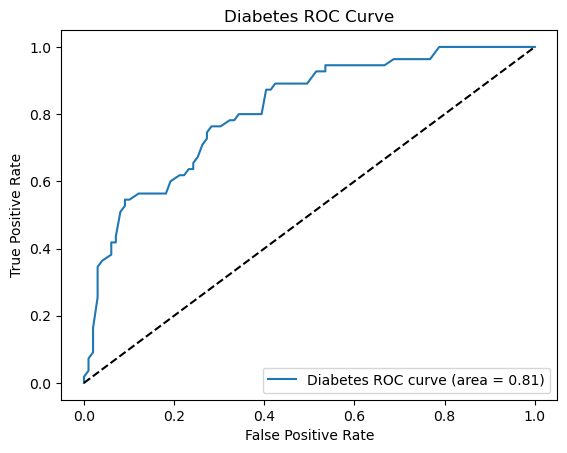

In [25]:
# 📚 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# ============================
# 1. Load Datasets
# ============================
##heart = pd.read_csv("heart.csv")
diabetes = pd.read_csv("diabetes.csv")

# ============================
# 2. Split Features and Labels
# ============================
##X_heart = heart.drop("target", axis=1)
##y_heart = heart["target"]

X_diabetes = diabetes.drop("Outcome", axis=1)
y_diabetes = diabetes["Outcome"]

# ============================
# 3. Train-Test Split
# ============================
##Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# ============================
# 4. Train Random Forest Models
# ============================
##rf_heart = RandomForestClassifier(random_state=42, n_estimators=100)
rf_diabetes = RandomForestClassifier(random_state=42, n_estimators=100)

##rf_heart.fit(Xh_train, yh_train)
rf_diabetes.fit(Xd_train, yd_train)

# ============================
# 5. Evaluate Heart Disease Model
# ============================
##y_pred_heart = rf_heart.predict(Xh_test)
##y_proba_heart = rf_heart.predict_proba(Xh_test)[:, 1]

##acc_heart = accuracy_score(yh_test, y_pred_heart)
##prec_heart = precision_score(yh_test, y_pred_heart)
##rec_heart = recall_score(yh_test, y_pred_heart)
##f1_heart = f1_score(yh_test, y_pred_heart)

##fpr_heart, tpr_heart, _ = roc_curve(yh_test, y_proba_heart)
##roc_auc_heart = auc(fpr_heart, tpr_heart)

##print("🏥 Heart Disease Model Metrics:")
##print(f"Accuracy:  {acc_heart:.4f}")
#print(f"Precision: {prec_heart:.4f}")
#print(f"Recall:    {rec_heart:.4f}")
##print(f"F1 Score:  {f1_heart:.4f}")
##print(f"ROC AUC:   {roc_auc_heart:.4f}")

##plt.figure()
##plt.plot(fpr_heart, tpr_heart, label=f"Heart ROC curve (area = {roc_auc_heart:.2f})")
##plt.plot([0, 1], [0, 1], 'k--')
##plt.xlabel("False Positive Rate")
##plt.ylabel("True Positive Rate")
##plt.title("Heart Disease ROC Curve")
##plt.legend(loc="lower right")
##plt.show()

# ============================
# 6. Evaluate Diabetes Model
# ============================
y_pred_diab = rf_diabetes.predict(Xd_test)
y_proba_diab = rf_diabetes.predict_proba(Xd_test)[:, 1]

acc_diab = accuracy_score(yd_test, y_pred_diab)
prec_diab = precision_score(yd_test, y_pred_diab)
rec_diab = recall_score(yd_test, y_pred_diab)
f1_diab = f1_score(yd_test, y_pred_diab)

fpr_diab, tpr_diab, _ = roc_curve(yd_test, y_proba_diab)
roc_auc_diab = auc(fpr_diab, tpr_diab)

print("\n🩸 Diabetes Model Metrics:")
print(f"Accuracy:  {acc_diab:.4f}")
print(f"Precision: {prec_diab:.4f}")
print(f"Recall:    {rec_diab:.4f}")
print(f"F1 Score:  {f1_diab:.4f}")
print(f"ROC AUC:   {roc_auc_diab:.4f}")

plt.figure()
plt.plot(fpr_diab, tpr_diab, label=f"Diabetes ROC curve (area = {roc_auc_diab:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Diabetes ROC Curve")
plt.legend(loc="lower right")
plt.show()


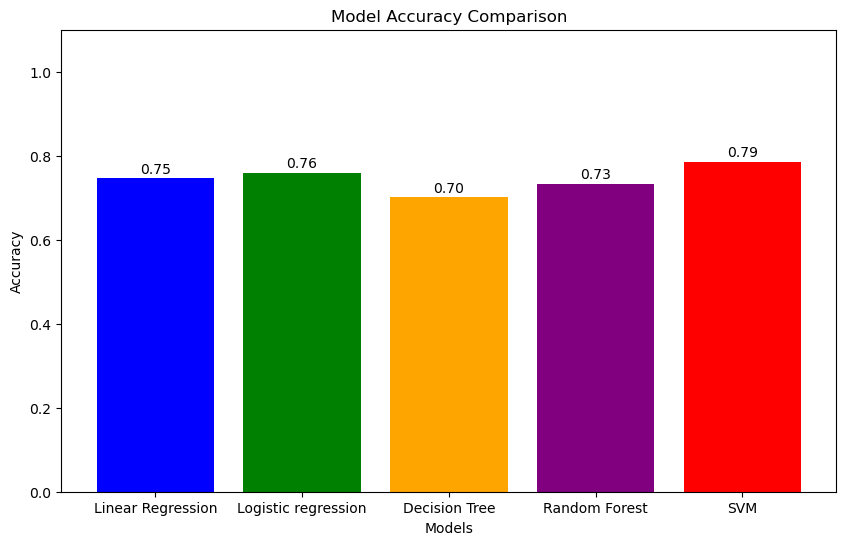

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Example model names and their accuracies
# (Replace these with your actual variables)
model_names = ['Linear Regression', 'Logistic regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [accuracy1,accuracy2, accuracy3, accuracy4, accuracy5]

# Create the bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color=['blue','green','orange','purple','red'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1.1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
